In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import researchpy as rp
import seaborn as sns

In [2]:
air = pd.read_csv(r"C:\Users\Balakrishna_Vema\Documents\Data science\Data sets\AirPassengers.csv")

In [3]:
air.shape

(80, 9)

In [4]:
air.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [5]:
air1= air[["Passengers","Promotion_Budget"]]

In [6]:
air1.head()

,Passengers,Promotion_Budget
0,37824,517356
1,43936,646086
2,42896,638330
3,35792,506492
4,38624,609658


In [7]:
rp.summary_cont(air1[["Passengers","Promotion_Budget"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Passengers,80.0,44745.025,11267.155215,1259.706249,42237.642433,47252.407567
1,Promotion_Budget,80.0,625422.350,156514.349317,17498.836226,590591.787759,660252.912241


In [8]:
import statsmodels.formula.api as smf
import statsmodels.formula.api as sms
from scipy import stats
from statsmodels.compat import lzip

In [9]:
model=smf.ols("Passengers~Promotion_Budget", data=air1).fit()
model.summary()

#The model explain a significant amount of variance which is indicate by F-value 1084(p<=0.05)
#H0: no variance in the model
#H1:significant amount of variance in the model

#if p<=0.05-reject the null hypothesis


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Passengers   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1084.
Date:                Mon, 27 Apr 2020   Prob (F-statistic):           1.66e-47
Time:                        05:38:24   Log-Likelihood:                -751.34
No. Observations:                  80   AIC:                             1507.
Df Residuals:                      78   BIC:                             1511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1259.6058   1361.071      0.925      0.358   -1450.078    3969.290
Promotion_Budget     0.0695      0.002     32.923      0.000       0.065       0.074
==============================================================================
Omnibus:                       26.624   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.188
Skew:                          -0.128   Prob(JB):                       0.0747
Kurtosis:                       1.779   Cond. No.                     2.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
#Omnibus test: measuring the amount of explained variance 
#durbin-wastson: measuring the a relationship between values are seperated by time lags
#jarque-Bera(JB): test of normality 
#cond.No: multi collinearity
#Ei(error): difference between actaul event and predicated event->alwasy first will hapen predicted event 


#Y^ =B0+B1x (y^ : predicting values, Bo-independnet cofficent, B1x: independnet variables)

#formula B1:(x-xbar)(y-ybar)/sum(x-xbar)2

#formula B0: ybar-B1Xbar (ybar : mean of the dependnet variable , xbar: mean of the independnet, B1:-slope/coffeicent of the variable ofX)

#b1:2(y is expected to increase by 2 for each one unit increse of x)
#B1: -2:- y is expected to decorease by 2 for each 1 unit of increase of x

#for my cause B1(0.0695 ):- passengers are expected to increause by 0.0695 for each 1unit(doller) increase of promation budget

In [11]:
def cofe_cal(x,y):
    ab=sum((x-np.mean(x))*(y-np.mean(y)))
    ab1=sum((x-np.mean(x))**2)
    slope=ab/ab1
    intercept=((np.mean(y))-(slope*(np.mean(x))))
    print("slope value", slope)
    print("inercept values", intercept)

In [12]:
cofe_cal(x=np.array(air["Promotion_Budget"]),y=np.array(air1["Passengers"]))

slope value 0.0695296852886541
inercept values 1259.6058320095326


(array([ 300000.,  400000.,  500000.,  600000.,  700000.,  800000.,
         900000., 1000000., 1100000., 1200000.]),
 <a list of 10 Text xticklabel objects>)

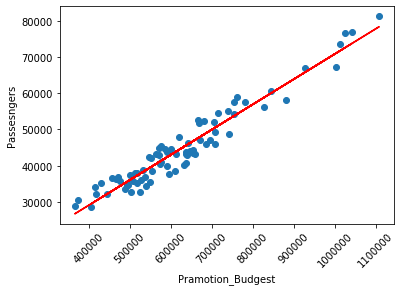

In [13]:
plt.scatter(air1["Promotion_Budget"],air1["Passengers"])
plt.plot(air1["Promotion_Budget"],model.predict(),"r")
plt.xlabel("Pramotion_Budgest")
plt.ylabel("Passesngers")
plt.xticks(rotation=45)

In [14]:
model.resid

0      592.794306
1    -2245.762081
2    -2746.489842
3     -683.835193
4    -5024.934706
         ...     
75    1171.983244
76    2911.842328
77   -2342.808855
78   -1690.706555
79    -387.731110
Length: 80, dtype: float64

In [15]:
from scipy import stats

In [16]:
model.resid.skew()

-0.1303331963191636

In [17]:
#common formal test for normality : KOlogarov-simrnov test ->sk test 
#chi-square test 


In [ ]:
#for errors are notmal distibuted : JB test, kstest, pplot&qqplot

In [22]:
#Diagnosing homoscadascity:-the HMs is vial role fail

In [23]:
stats.levene(air["Passengers"],air1["Promotion_Budget"])

LeveneResult(statistic=77.98896109396058, pvalue=1.8727635361889465e-15)

In [24]:
#R(Sqr): ssr/sst: sume of squares of regresson/sum of squares of total or 1-sse/sst
#y-b0+b1x+e pred=b0_b1x
#y = Y(hat)+e
#e=y-Y(hat)  y:actual dependnet, y(hat): peredict value, e:error

#sum(ei)2 = sum(n)(i=1)(yi-y(hat)ser2: SEE: sum of squares of error

In [25]:
air1.head()

,Passengers,Promotion_Budget
0,37824,517356
1,43936,646086
2,42896,638330
3,35792,506492
4,38624,609658


In [1]:
def r2_cal(y):
    sse=np.square(y-model.predict())

In [2]:
#28th Class 

In [3]:
#AIC: Akaike's information of criteria, it compares the quaity of set statstical models to each others 

#AIC fromula: 2x(log-likelihood)+2k -> number of independent variables in the model intercept 

#AIC estimate the relative amount of information lost by given model 

#Lesser the lossing information better the quality of a model 


#BIC: Baysian information ceriteria other name SBC or SBIC->schewarz criteria 

#it is a criteria for model selection among a final set of model
#value is closly with AIC value 
#when it billing the model it is possible to increse the likelehood adding parameters->highly likelky chances the overfiting of the data
#BIC resolve the problam by interducing the penality term for tge number of parameters in the modle 

#BIC formula: -2*LL+K*ln(n)

#loglikelihood: it maximizes to determine the optimal values of the estimated coefficent (B0 & B1)
#loglikelihood values can't be used a loan as index(model) of fit because there are a function of sample size but can be used to compare the fir of different coefficent 


In [4]:
#Jarquebera: n/6[s2+1/4(k-3)2] - s: skew ness and k: kutosis
#what is the meaning of jarqubera test to test the goodness of the test 


#use of JB test: JB test is a good ness of fit in the model: weather sample data have the skewnessa and kwtosis matching the normal distribution


In [5]:
#Omnibustest: the test whether the explained variance in as et of data is significantly greter explained variance 
#Ominbus test use Anova test 

#other name of omnibus test is F-test->liner regression, chi-squre-logistics 

#H0: variance of all variables are the same 
#H1: variance of all variables can't be the same 

#Formula F = R2/(k-1)/(1-R2)/n-k

In [ ]:
#Durbin-Watson: the errors are independent or not 
#is the sameple auto correlation of residuals 
#d=2:->no auto correlation
#tha range of durnin-watson
#if d<2 : the evidance possitive serial correlation
#if d>2: there is an evidance for negative serial correlation
#but industry alwasy use betwene 1.5 to 2.5 is good and no autoo correlation 